In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

Support Vector Clasification

In [30]:
data=pd.read_csv("Bank.CSV")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [31]:
x=data.iloc[:,:7]
y=data.iloc[:,7]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Creating the model

In [33]:
svcl=SVC(kernel="linear",C=1,probability=True)

Training the model

In [34]:
svcl.fit(x_train,y_train)

SVC(C=1, kernel='linear', probability=True)

Predictions and accuracy

In [35]:
y_pred=svcl.predict(x_test)
accuracy_score(y_test,y_pred)

0.9026462733673222

Confusion Matrix

In [36]:
confusion_matrix(y_test,y_pred)

array([[7184,  141],
       [ 661,  252]], dtype=int64)

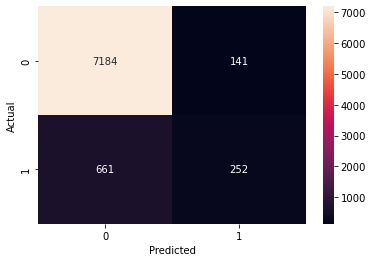

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.64      0.28      0.39       913

    accuracy                           0.90      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.89      0.90      0.88      8238



ROC & AUC

In [39]:
y_pred_probs=svcl.predict_proba(x_test)

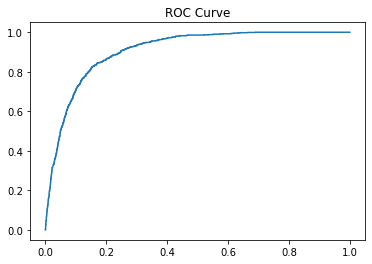

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()

In [41]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
auc

0.9080116930645326

Selecting parameters with Hyper Parameter Optimization

In [42]:
params={"C":[0.5,1],"kernel":["linear","poly"]}
model=SVC()
cval=KFold(n_splits=2)

In [43]:
gsearch = GridSearchCV(model, params,cv=cval)

In [44]:
results = gsearch.fit(x_train, y_train)

In [45]:
results.best_params_
results.best_params_

{'C': 1, 'kernel': 'linear'}

Support Vector Regression

In [46]:
data=pd.read_csv("Boston.CSV")
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
x=data.iloc[:,:12]
y=data.iloc[:,12]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
svrg=SVR(kernel="linear",C=1)

In [50]:
svrg.fit(x_train,y_train)

SVR(C=1, kernel='linear')

In [51]:
y_pred=svrg.predict(x_test)
mean_squared_error(y_test,y_pred)

39.93724952871917

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.319592512869732